In [1]:
# https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner/notebook

#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import train and test CSV files
train = pd.read_csv("C:/Users/User/Desktop/Oxford_DPhil/Kaggle/Titanic/Titanic_data/train.csv")
test = pd.read_csv("C:/Users/User/Desktop/Oxford_DPhil/Kaggle/Titanic/Titanic_data/test.csv")

# take a look at the data
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Fleming, Miss. Margaret",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
# get a list of the features withi the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
#see a sample of the dataset to get an idea of the variables - to return a random
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S


train.drop(columns = ['Age', 'Name'])

train.loc[0]

train.loc[[0]]

train.loc[0, 'Age']

train.loc[2:20, 'Survived']

In [5]:
# chekc for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


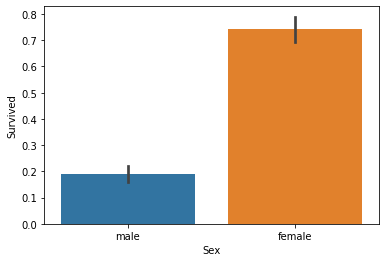

In [6]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

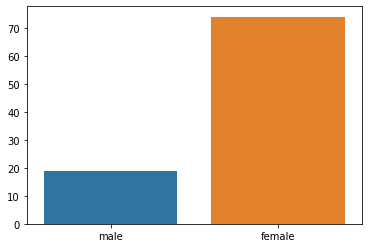

In [7]:


x = ["male", "female"]
y = [train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100, train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100]

sns.barplot(x,y)

In [8]:
male = train["Survived"][train["Sex"] == 'male']
print("sd of male survived: ", male.std())

female = train["Survived"][train["Sex"] == 'female']
print("sd of female survived: ", female.std())

sd of male survived:  0.39177527778591387
sd of female survived:  0.43821120391621965


In [9]:
print(train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

18.890814558058924


print(train["Survived"])

print(train["Survived"][train["Sex"] == 'male'][train["Age"] == 38.0])

In [10]:
print(train["Survived"][train["Sex"] == 'male'])

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64


train["Survived"][train["Sex"] == 'male'][train["Survived"] == 1]

In [11]:
print(train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True))

0    0.811092
1    0.188908
Name: Survived, dtype: float64


Percentage of Pclass = 1 who survived:  62.96296296296296
Percentage of Pclass = 2 who survived:  47.28260869565217
Percentage of Pclass = 3 who survived:  24.236252545824847


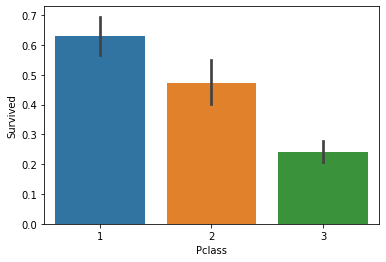

In [12]:
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
class_one = train['Survived'][train['Pclass'] == 1].value_counts(normalize = True)[1]*100
class_two = train['Survived'][train['Pclass'] == 2].value_counts(normalize = True)[1]*100
class_three = train['Survived'][train['Pclass'] == 3].value_counts(normalize = True)[1]*100

print("Percentage of Pclass = 1 who survived: ", class_one)
print("Percentage of Pclass = 2 who survived: ", class_two)
print("Percentage of Pclass = 3 who survived: ", class_three)

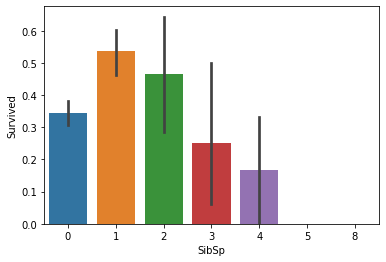

In [13]:
sns.barplot(x="SibSp", y="Survived", data=train)

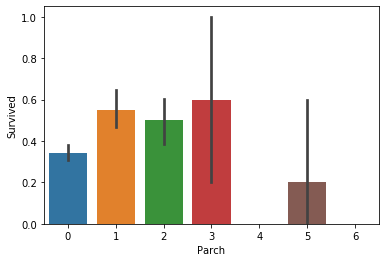

In [14]:
sns.barplot(x="Parch", y="Survived", data=train)

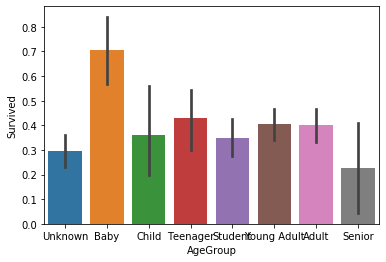

In [15]:
# sort the ages into lofical categories

# replace all the NaN elements with 0.5s
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] # np = numpy, inf numpy version infinity
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

# Bin values into discrete intervals.
# Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = labels)

#draw a bar plot of age vs survival
sns.barplot(x = "AgeGroup", y = "Survived", data = train)

% of CabinBool = True who survived
66.66666666666666
% of CabinBool = False who survived
29.985443959243085


[Text(0, 0, 'no cabin number'), Text(0, 0, 'yes cabin number')]

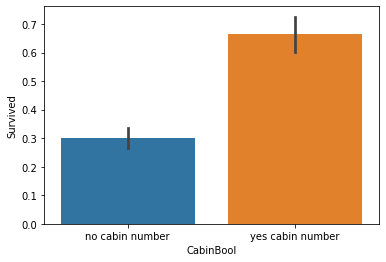

In [16]:
train["CabinBool"] = train["Cabin"].notnull().astype('int')
test["CabinBool"] = test["Cabin"].notnull().astype('int')

print("% of CabinBool = True who survived")
print(train["Survived"][train["CabinBool"] == True].value_counts(normalize = 1)[1]*100)

print("% of CabinBool = False who survived")
print(train["Survived"][train["CabinBool"] == False].value_counts(normalize = 1)[1]*100)

plot = sns.barplot(x = "CabinBool", y = "Survived", data=train)
plot.set_xticklabels(["no cabin number", "yes cabin number"])

In [17]:
# cleaning data
test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Asplund, Mr. Johan Charles",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [18]:
# drop feature for dropping specific labels from rows or columns (axis 1 represents columns, axis 0 represents index)
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [19]:
#fill in the mssing values in the Embarked feature
# shape[0] = give number of row count
# shape[1] = give number of column count

print("Number of people embarking in Southampton (S)")
southampton = train[train['Embarked'] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C)")
cherbourg = train[train['Embarked'] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Southampton (Queenstown )")
queenstown = train[train['Embarked'] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S)
644
Number of people embarking in Cherbourg (C)
168
Number of people embarking in Southampton (Queenstown )
77


In [20]:
# most people embarked in S, fill the rest in S
train = train.fillna({'Embarked': "S"})

In [21]:
# predict the missing age
#combine group of both dataset
combine = [train, test]

#extract a title for each Name
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([a-zA-Z]+)[\.]', expand = False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
# replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [23]:
# map each of the title groups to a numerical value

title_mapping = {'Mr': 1, 'Miss':2, 'Mrs': 3, 'Master': 4, 'Royal': 5, 'Rare': 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
